In [ ]:
#!pip install statsmodels

In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

### Load Data

#### Load Landcover Data

In [31]:
mc = pd.read_csv('sd_microclimate.csv')

In [32]:
mc = mc.drop(['Unnamed: 0'],axis=1)

In [33]:
mc

,polygon,year,lst_day_mean,lst_day_max,lst_day_min,lst_night_mean,lst_night_max,lst_night_min
0,92130,2010,30.493352,33.74,23.56,12.746009,14.02,11.70
1,92130,2012,31.008651,35.30,22.94,13.995664,15.52,12.58
2,92130,2014,33.890284,38.40,27.46,15.721636,16.92,14.18
3,92130,2016,30.804146,34.06,24.48,13.757657,15.30,12.46
4,92130,2018,31.491457,35.66,24.70,13.621281,14.82,12.00
...,...,...,...,...,...,...,...,...
175,92101,2012,31.798712,35.68,22.88,15.969636,16.82,14.12
176,92101,2014,33.552172,37.38,24.71,17.579715,18.26,14.26
177,92101,2016,30.887026,35.01,20.98,15.095548,16.68,13.84
178,92101,2018,31.790502,35.42,23.32,15.102751,16.00,13.72


In [34]:
def diff_column_mc(df,column_name):
    '''Calculates delta from the consecutive 2 year period for a zipcode and a class'''
    df[column_name + '_delta'] = df[column_name] - df.groupby(['polygon'])[column_name].shift()
    return df

In [35]:
feature_list_mc = ['lst_day_mean',
                'lst_day_max',
                'lst_day_min',
                'lst_night_mean',
                'lst_night_max',
                'lst_night_min']
for feature in feature_list_mc:
    diff_column_mc(mc, feature)

In [36]:
mc

,polygon,year,lst_day_mean,lst_day_max,lst_day_min,lst_night_mean,lst_night_max,lst_night_min,lst_day_mean_delta,lst_day_max_delta,lst_day_min_delta,lst_night_mean_delta,lst_night_max_delta,lst_night_min_delta
0,92130,2010,30.493352,33.74,23.56,12.746009,14.02,11.70,NaN,NaN,NaN,NaN,NaN,NaN
1,92130,2012,31.008651,35.30,22.94,13.995664,15.52,12.58,0.515299,1.56,-0.62,1.249656,1.50,0.88
2,92130,2014,33.890284,38.40,27.46,15.721636,16.92,14.18,2.881633,3.10,4.52,1.725972,1.40,1.60
3,92130,2016,30.804146,34.06,24.48,13.757657,15.30,12.46,-3.086139,-4.34,-2.98,-1.963979,-1.62,-1.72
4,92130,2018,31.491457,35.66,24.70,13.621281,14.82,12.00,0.687311,1.60,0.22,-0.136376,-0.48,-0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,92101,2012,31.798712,35.68,22.88,15.969636,16.82,14.12,0.704937,1.00,1.31,1.180462,1.36,1.65
176,92101,2014,33.552172,37.38,24.71,17.579715,18.26,14.26,1.753460,1.70,1.83,1.610079,1.44,0.14
177,92101,2016,30.887026,35.01,20.98,15.095548,16.68,13.84,-2.665146,-2.37,-3.73,-2.484167,-1.58,-0.42
178,92101,2018,31.790502,35.42,23.32,15.102751,16.00,13.72,0.903475,0.41,2.34,0.007203,-0.68,-0.12


In [37]:
solar = pd.read_csv('project-sunroof-postal_code.csv')

In [38]:
solar

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,12210,New York,42.670146,42.648346,-73.747372,-73.768631,42.656878,-73.759919,961.35,1969,...,4.109930e+05,2.373516e+06,2.534450e+06,7.508317e+05,2.450000e+07,7305.194678,3.060000e+07,"[[0,610],[5,899],[10,223],[15,75],[20,31],[25,...",11180.899850,1
1,12211,New York,42.756115,42.671905,-73.721030,-73.830649,42.706435,-73.765975,961.35,3633,...,1.021738e+06,2.110000e+07,1.130000e+07,1.230000e+07,2.470000e+07,11021.458700,7.040000e+07,"[[0,582],[5,1211],[10,1023],[15,431],[20,183],...",25735.357620,17
2,12222,New York,42.691756,42.688628,-73.827249,-73.830098,42.690409,-73.828811,961.35,30,...,3.440671e+04,4.849979e+05,4.800721e+05,7.025353e+04,1.109636e+05,36431.040360,1.180694e+06,"[[0,1],[5,1],[15,1],[20,2],[25,8],[30,15],[65,...",431.447609,0
3,12235,New York,42.738615,42.738458,-73.820816,-73.820885,42.738536,-73.820850,961.35,1,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.558662e+04,35586.624610,3.558662e+04,"[[30,1]]",13.004019,0
4,12246,New York,42.647312,42.646912,-73.749521,-73.749785,42.647112,-73.749653,961.35,2,...,0.000000e+00,1.831440e+03,0.000000e+00,0.000000e+00,3.329192e+04,5495.239624,3.512336e+04,"[[5,1],[25,1]]",12.834735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11511,12205,New York,42.761418,42.680620,-73.768585,-73.873630,42.714920,-73.821247,961.35,9079,...,5.541931e+06,4.150000e+07,1.440000e+07,2.330000e+07,1.840000e+08,8629.177588,2.680000e+08,"[[0,2123],[5,3788],[10,1611],[15,525],[20,163]...",98072.152380,57
11512,12206,New York,42.690859,42.658285,-73.757352,-73.827708,42.668939,-73.775947,961.35,3679,...,7.648997e+05,6.317005e+06,6.933146e+06,2.307506e+06,8.100000e+07,7495.710059,9.730000e+07,"[[0,1091],[5,1537],[10,538],[15,119],[20,72],[...",35563.539680,13
11513,12207,New York,42.668923,42.645456,-73.740853,-73.757623,42.654537,-73.750588,961.35,426,...,3.560627e+05,1.164884e+06,1.291236e+06,5.853155e+05,3.220000e+07,20374.244340,3.560000e+07,"[[0,43],[5,80],[10,58],[15,42],[20,26],[25,22]...",13022.030640,2
11514,12208,New York,42.667930,42.641115,-73.767870,-73.845467,42.655747,-73.799264,961.35,5227,...,1.140634e+06,1.900000e+07,1.920000e+07,5.664338e+06,3.470000e+07,7842.926550,7.970000e+07,"[[0,1441],[5,2280],[10,901],[15,255],[20,105],...",29141.878800,24


In [39]:
energy = pd.read_csv('SDGE-ELEC-Q2-2012-2020.csv')

In [40]:
energy = energy.groupby(['ZipCode','Year']).mean().reset_index()

In [41]:
energy['Month'].value_counts()

5.0    725
Name: Month, dtype: int64

In [42]:
energy = energy[['ZipCode','Year','TotalkWh']]

In [43]:
energy

,ZipCode,Year,TotalkWh
0,91901,2012,4.339670e+05
1,91901,2014,1.868998e+06
2,91901,2016,2.542373e+05
3,91901,2018,8.599991e+05
4,91901,2020,1.211969e+06
...,...,...,...
720,92694,2012,2.827453e+05
721,92694,2014,1.796248e+06
722,92694,2016,3.694672e+05
723,92694,2018,1.788355e+06


In [44]:
def diff_column_energy(df,column_name):
    '''Calculates delta from the consecutive 2 year period for a zipcode and a class'''
    df[column_name + '_delta'] = df[column_name] - df.groupby(['ZipCode'])[column_name].shift()
    return df

In [45]:
diff_column_energy(energy, 'TotalkWh')

,ZipCode,Year,TotalkWh,TotalkWh_delta
0,91901,2012,4.339670e+05,NaN
1,91901,2014,1.868998e+06,1.435032e+06
2,91901,2016,2.542373e+05,-1.614761e+06
3,91901,2018,8.599991e+05,6.057618e+05
4,91901,2020,1.211969e+06,3.519702e+05
...,...,...,...,...
720,92694,2012,2.827453e+05,NaN
721,92694,2014,1.796248e+06,1.513503e+06
722,92694,2016,3.694672e+05,-1.426781e+06
723,92694,2018,1.788355e+06,1.418888e+06


In [46]:
mc_energy = mc.merge(energy, left_on=['year','polygon'], right_on=['Year','ZipCode'])
mc_energy

,polygon,year,lst_day_mean,lst_day_max,lst_day_min,lst_night_mean,lst_night_max,lst_night_min,lst_day_mean_delta,lst_day_max_delta,lst_day_min_delta,lst_night_mean_delta,lst_night_max_delta,lst_night_min_delta,ZipCode,Year,TotalkWh,TotalkWh_delta
0,92130,2012,31.008651,35.30,22.94,13.995664,15.52,12.58,0.515299,1.56,-0.62,1.249656,1.50,0.88,92130,2012,4.183444e+05,NaN
1,92130,2014,33.890284,38.40,27.46,15.721636,16.92,14.18,2.881633,3.10,4.52,1.725972,1.40,1.60,92130,2014,4.227977e+06,3.809633e+06
2,92130,2016,30.804146,34.06,24.48,13.757657,15.30,12.46,-3.086139,-4.34,-2.98,-1.963979,-1.62,-1.72,92130,2016,7.840274e+05,-3.443950e+06
3,92130,2018,31.491457,35.66,24.70,13.621281,14.82,12.00,0.687311,1.60,0.22,-0.136376,-0.48,-0.46,92130,2018,3.871447e+06,3.087420e+06
4,92130,2020,31.468713,34.75,25.22,15.208200,16.45,14.08,-0.022744,-0.91,0.52,1.586919,1.63,2.08,92130,2020,4.100697e+06,2.292498e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,92101,2012,31.798712,35.68,22.88,15.969636,16.82,14.12,0.704937,1.00,1.31,1.180462,1.36,1.65,92101,2012,2.028816e+06,NaN
146,92101,2014,33.552172,37.38,24.71,17.579715,18.26,14.26,1.753460,1.70,1.83,1.610079,1.44,0.14,92101,2014,9.476264e+06,7.447449e+06
147,92101,2016,30.887026,35.01,20.98,15.095548,16.68,13.84,-2.665146,-2.37,-3.73,-2.484167,-1.58,-0.42,92101,2016,1.556568e+06,-7.919697e+06
148,92101,2018,31.790502,35.42,23.32,15.102751,16.00,13.72,0.903475,0.41,2.34,0.007203,-0.68,-0.12,92101,2018,1.090981e+07,9.353242e+06


In [47]:
mc_energy = mc_energy.dropna()

In [48]:
x = mc_energy[['lst_day_mean_delta', 'lst_night_mean_delta']]

In [49]:
y = mc_energy[['TotalkWh_delta']]

In [50]:
x = sm.add_constant(x)

In [51]:
model = sm.OLS(y, x)

In [52]:
results = model.fit()

In [53]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         TotalkWh_delta   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     47.33
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           8.67e-16
Time:                        20:53:06   Log-Likelihood:                -1968.0
No. Observations:                 120   AIC:                             3942.
Df Residuals:                     117   BIC:                             3950.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.905e+05 

In [54]:
df = mc_energy.merge(solar, left_on=['polygon'], right_on=['region_name'])
df

,polygon,year,lst_day_mean,lst_day_max,lst_day_min,lst_night_mean,lst_night_max,lst_night_min,lst_day_mean_delta,lst_day_max_delta,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,92130,2014,33.890284,38.40,27.46,15.721636,16.92,14.18,2.881633,3.10,...,1.050000e+07,106000000.0,6.560000e+07,7.900000e+07,54500000.0,17650.29814,316000000.0,"[[0,831],[5,3822],[10,3873],[15,2175],[20,743]...",86053.12148,587
1,92130,2016,30.804146,34.06,24.48,13.757657,15.30,12.46,-3.086139,-4.34,...,1.050000e+07,106000000.0,6.560000e+07,7.900000e+07,54500000.0,17650.29814,316000000.0,"[[0,831],[5,3822],[10,3873],[15,2175],[20,743]...",86053.12148,587
2,92130,2018,31.491457,35.66,24.70,13.621281,14.82,12.00,0.687311,1.60,...,1.050000e+07,106000000.0,6.560000e+07,7.900000e+07,54500000.0,17650.29814,316000000.0,"[[0,831],[5,3822],[10,3873],[15,2175],[20,743]...",86053.12148,587
3,92130,2020,31.468713,34.75,25.22,15.208200,16.45,14.08,-0.022744,-0.91,...,1.050000e+07,106000000.0,6.560000e+07,7.900000e+07,54500000.0,17650.29814,316000000.0,"[[0,831],[5,3822],[10,3873],[15,2175],[20,743]...",86053.12148,587
4,92131,2014,41.188298,44.40,37.72,15.551403,17.30,14.28,3.591900,3.22,...,1.820000e+07,90300000.0,6.060000e+07,7.100000e+07,53800000.0,23112.83269,294000000.0,"[[0,450],[5,1789],[10,2497],[15,2152],[20,1322...",80136.20116,1560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,92113,2020,35.530205,38.56,30.56,16.496159,17.17,15.36,0.329975,0.46,...,1.240000e+07,33300000.0,2.750000e+07,3.570000e+07,110000000.0,12550.46561,219000000.0,"[[0,2015],[5,3441],[10,1799],[15,801],[20,355]...",59665.19216,125
116,92101,2014,33.552172,37.38,24.71,17.579715,18.26,14.26,1.753460,1.70,...,2.701914e+06,11300000.0,6.005828e+06,8.860152e+06,145000000.0,20856.35641,174000000.0,"[[0,479],[5,451],[10,256],[15,153],[20,154],[2...",47513.38890,57
117,92101,2016,30.887026,35.01,20.98,15.095548,16.68,13.84,-2.665146,-2.37,...,2.701914e+06,11300000.0,6.005828e+06,8.860152e+06,145000000.0,20856.35641,174000000.0,"[[0,479],[5,451],[10,256],[15,153],[20,154],[2...",47513.38890,57
118,92101,2018,31.790502,35.42,23.32,15.102751,16.00,13.72,0.903475,0.41,...,2.701914e+06,11300000.0,6.005828e+06,8.860152e+06,145000000.0,20856.35641,174000000.0,"[[0,479],[5,451],[10,256],[15,153],[20,154],[2...",47513.38890,57


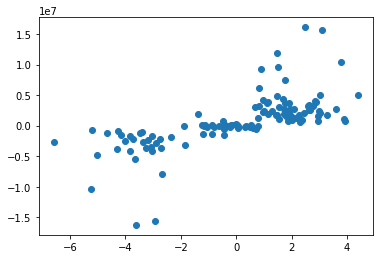

In [55]:
import matplotlib.pyplot as plt

plt.scatter(mc_energy.lst_day_mean_delta, mc_energy.TotalkWh_delta)